## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pds
import numpy as npy
import seaborn as sbn
import matplotlib.pyplot as matplt

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

### Load the dataset

In [2]:
## reading dataset file
tipsDataFrame = pds.read_csv('tips.csv')

## setting max columns to none
pds.set_option('display.max_columns', None)

tipsDataFrame

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1. Make a list of categorical and numerical columns in the data.

In [3]:
categories = []
numberValues = []
for i in tipsDataFrame.columns:
    if tipsDataFrame[i].dtypes=='object':
        categories.append(i)
    else:
        numberValues.append(i)      
print('The categorical variables are:\n',categories,'\n')
print('The numerical variables are:\n',numberValues)

The categorical variables are:
 ['sex', 'smoker', 'day', 'time'] 

The numerical variables are:
 ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [4]:
tipsDataFrame.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [5]:
tipsDataFrame.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [6]:
tipsDataFrame.groupby('time')['size'].count()

time
Dinner    176
Lunch      68
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [7]:
tipsDataFrame['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [8]:
tipsDataFrame.day.mode()

0    Sat
Name: day, dtype: object

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

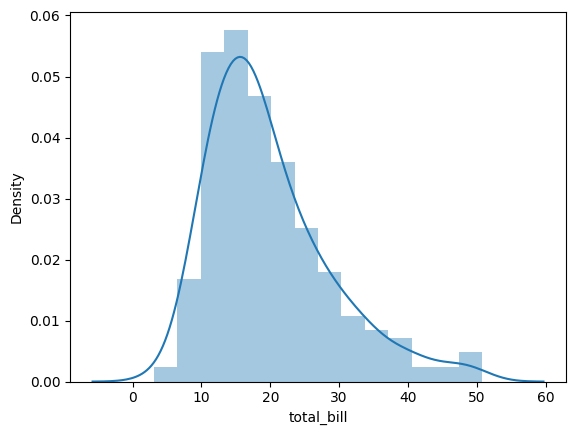

In [9]:
sbn.distplot(tipsDataFrame['total_bill'])
matplt.show()

In [10]:
tipsDataFrame['total_bill'].skew()

1.1332130376158205

total_bill is right skewed

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [11]:
tipsDataFrame[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


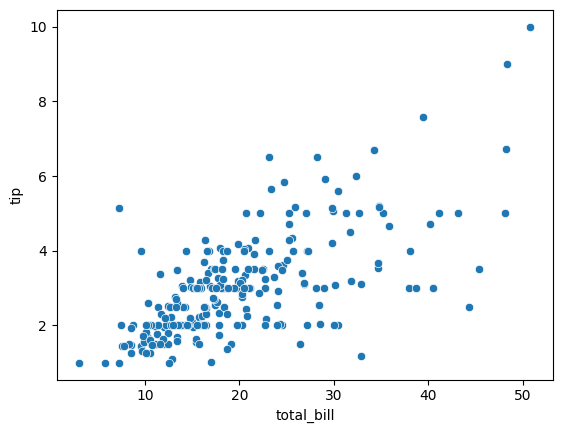

In [12]:
sbn.scatterplot(x='total_bill',y='tip',data=tipsDataFrame)
matplt.show()

From the Plot we can see that tip is directly proportional to total bill. As Bill Increase, tip amount automatically increases.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

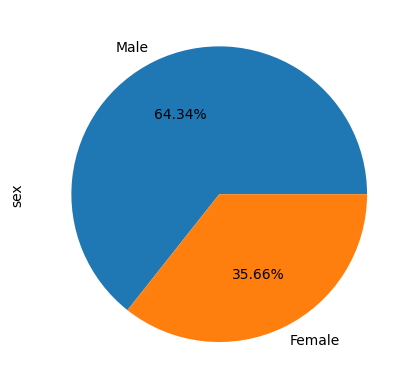

In [13]:
tipsDataFrame['sex'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
matplt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [14]:
tipsDataFrame.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: smoker, dtype: int64

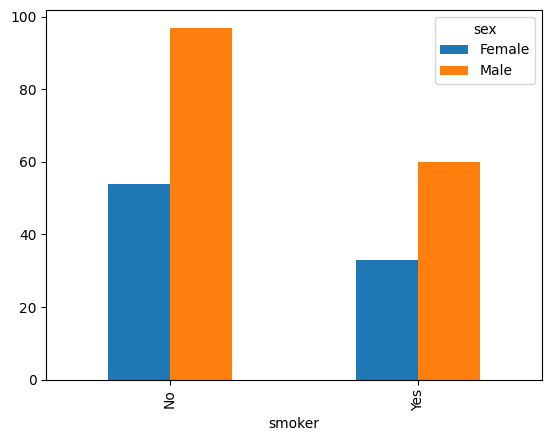

In [15]:
pds.crosstab(tipsDataFrame['smoker'],tipsDataFrame['sex']).plot(kind='bar')
matplt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

In [16]:
tipsDataFrame.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

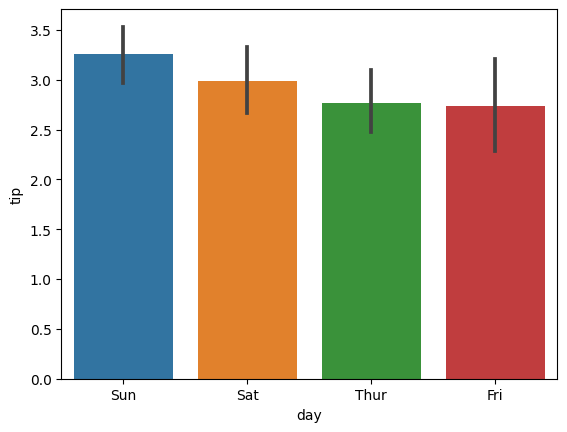

In [17]:
sbn.barplot(x='day',y='tip',data=tipsDataFrame)
matplt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

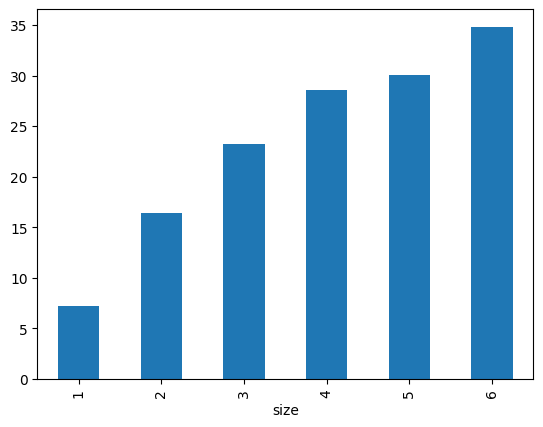

In [18]:
tipsDataFrame.groupby('size')['total_bill'].mean().plot(kind='bar')
matplt.show()

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

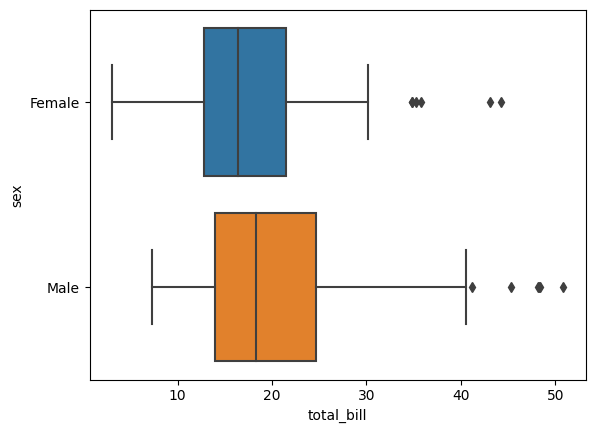

In [19]:
sbn.boxplot(x='total_bill',y='sex',data=tipsDataFrame)
matplt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [20]:
tipsDataFrame.groupby(['time','day'])['total_bill'].max()

time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [21]:
tipsDataFrame.isnull().sum()/len(tipsDataFrame)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [22]:
len(tipsDataFrame[tipsDataFrame.duplicated()])

1

One Duplicate Value is Found. We will eliminate in the next step.

In [23]:
tipsDataFrame.drop_duplicates(inplace=True)

In [24]:
len(tipsDataFrame[tipsDataFrame.duplicated()])

0

Duplicate Value removed successfully.

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

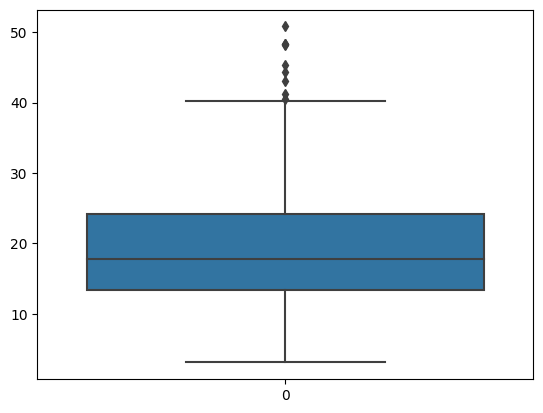

In [25]:
# before transformation
sbn.boxplot(tipsDataFrame['total_bill'])
matplt.show()

In [26]:
# Using Log Transformation to Remove Outliers
tipsDataFrame['total_bill_1'] = npy.log(tipsDataFrame['total_bill'])

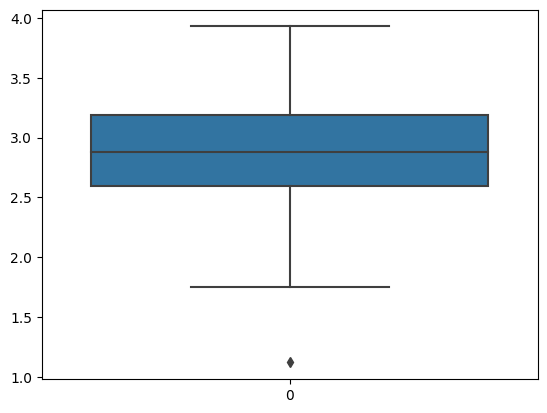

In [27]:
# after transformation
sbn.boxplot(tipsDataFrame['total_bill_1'])
matplt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

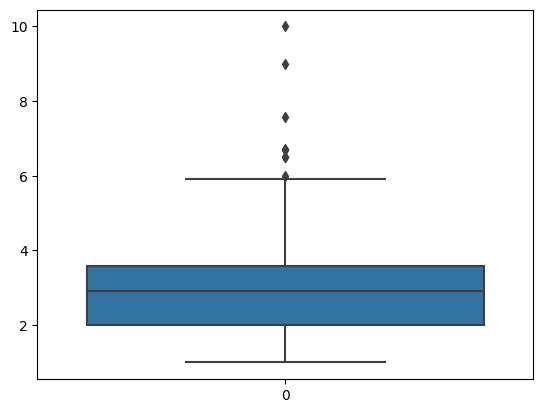

In [28]:
# Before IQR
sbn.boxplot(tipsDataFrame['tip'])
matplt.show()

In [29]:
var1 = tipsDataFrame['tip'].quantile(0.25)
var2 = tipsDataFrame['tip'].quantile(0.75)
IQR = var2-var1

var3  = var1-(1.5*IQR)
var4  = var2+(1.5*IQR)

#dataFrame without outliers
tipsDataFrameNew = tipsDataFrame.loc[(tipsDataFrame['tip'] < var4) & (tipsDataFrame['tip'] > var3)] 

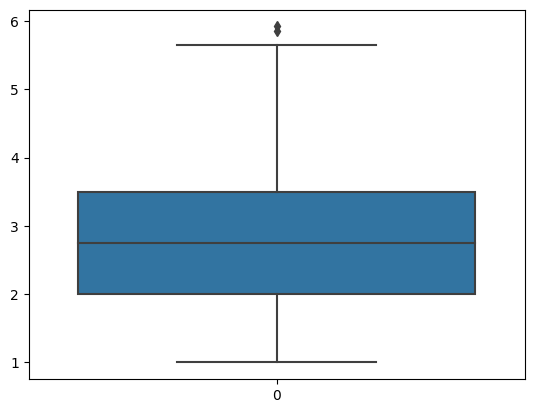

In [30]:
# After IQR
sbn.boxplot(tipsDataFrameNew['tip'])
matplt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [31]:
tipsDataFrame = pds.get_dummies(tipsDataFrame,drop_first=True)
tipsDataFrame.sample(5)

,total_bill,tip,size,total_bill_1,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
10,10.27,1.71,2,2.329227,1,0,0,1,0,0
141,34.30,6.70,6,3.535145,1,0,0,0,1,1
192,28.44,2.56,2,3.347797,1,1,0,0,1,1
160,21.50,3.50,4,3.068053,1,0,0,1,0,0
2,21.01,3.50,3,3.044999,1,0,0,1,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [32]:
bill_max = tipsDataFrame['total_bill'].max()
bill_min = tipsDataFrame['total_bill'].min()
bill_range = bill_max-bill_min
print(bill_range)

47.74


In [33]:
mms = MinMaxScaler()
tipsDataFrame['total_bill_mms'] = mms.fit_transform(tipsDataFrame[['total_bill']])
bill_mms_max = tipsDataFrame['total_bill_mms'].max()
bill_mms_min = tipsDataFrame['total_bill_mms'].min()
bill_mms_range = bill_mms_max-bill_mms_min
print(bill_mms_range)

0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [34]:
tips_df = pds.read_csv('tips.csv')
tips_df.head(2) 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [35]:
# i) Encode the categorical variables
tips_df = pds.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0


In [36]:
# ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable
X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [37]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

## Scaling the data using min max scaling
mms = MinMaxScaler()

X_train.iloc[:,:2] = mms.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mms.transform(X_test.iloc[:,:2])

(170, 8) (74, 8)
(170,) (74,)


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

#r_squared value
print('r_squared value test:', r2_score(y_test,pred))

r_squared value test: 0.5331573496576858


### Happy Learning:)